In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ClimateTrain.csv')

In [2]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df['date']=pd.to_datetime(df['date'])

In [4]:
df.set_index('date',inplace=True)

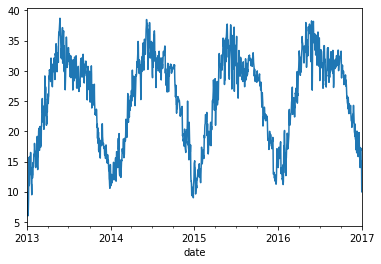

In [5]:
df['meantemp'].plot()

In [6]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['meantemp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [7]:
print(df.shape)
train=df[:-300]
test=df[-300:]
print(train.shape, "train shape")
print(test.shape, "test shape")

(1462, 4)
(1162, 4) train shape
(300, 4) test shape


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller(df["meantemp"])

(-2.021069055920673,
 0.2774121372301602,
 10,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5423.895746470953)

<h3>Arima<h3>

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['meantemp'],order=(1,1,1))
model=model.fit()
model.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1162
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2202.128
Date:                Thu, 03 Feb 2022   AIC                           4410.256
Time:                        18:25:20   BIC                           4425.427
Sample:                    01-01-2013   HQIC                          4415.980
                         - 03-07-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5745      0.053     10.871      0.000       0.471       0.678
ma.L1         -0.7963      0.042    -18.781      0.000      -0.879      -0.713
sigma2         2.5999      0.079     32.708      0.000       2.444       2.756
===================================================================================
Ljung-Box (Q):                       55.44   Jarque-Bera (JB):               252.31
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.47
Prob(H) (two-sided):                  0.82   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

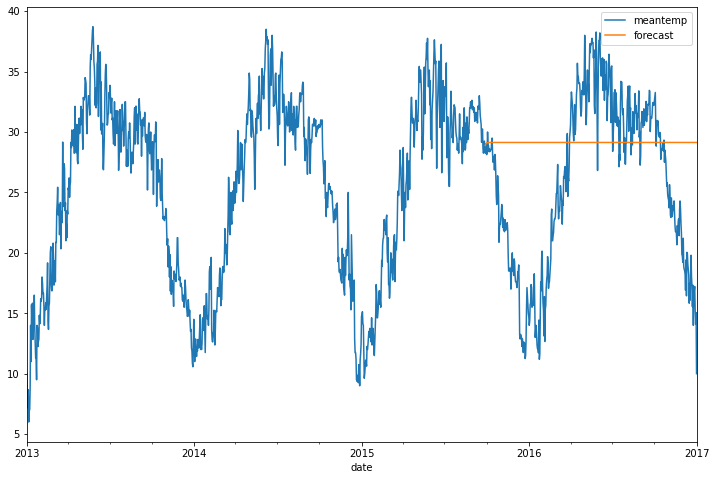

In [11]:
df['forecast']=model.predict(start=1000,end=1462,dynamic=True)
df[['meantemp','forecast']].plot(figsize=(12,8))

<h3>Sarima<h3>

In [12]:
import statsmodels.api as sm

In [13]:
model1=sm.tsa.statespace.SARIMAX(df['meantemp'],order=(1, 1, 1),seasonal_order=(1,1,1,200))
results=model1.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MemoryError: Unable to allocate 1.77 GiB for an array with shape (403, 403, 1462) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 964, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 1.77 GiB for an array with shape (403, 403, 1462) and data type float64


AttributeError: Memoryview is not initialized

In [ ]:
df['forecast']=results.predict(start=1000,end=1462,dynamic=True)
df[['meantemp','forecast']].plot(figsize=(12,8))